new


In [28]:
import pandas as pd

# Load datasets
movies = pd.read_csv('/content/movies.csv')
tags = pd.read_csv('/content/genome-tags.csv')
links = pd.read_csv('/content/links.csv')


In [23]:
import pandas as pd

# Load datasets
movies = pd.read_csv('/content/movies.csv')
tags = pd.read_csv('/content/genome-tags.csv')
links = pd.read_csv('/content/links.csv')

# Display first 5 rows of each in CSV format
print("----- movies.csv -----")
print(movies.head().to_csv(index=False))

print("----- genome-tags.csv -----")
print(tags.head().to_csv(index=False))

print("----- links.csv -----")
print(links.head().to_csv(index=False))


----- movies.csv -----
movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy

----- genome-tags.csv -----
tagId,tag
1,007
2,007 (series)
3,18th century
4,1920s
5,1930s

----- links.csv -----
movieId,imdbId,tmdbId
1,114709,862.0
2,113497,8844.0
3,113228,15602.0
4,114885,31357.0
5,113041,11862.0



In [31]:
import pandas as pd

# Load your datasets
movies = pd.read_csv('/content/movies.csv')
tags = pd.read_csv('/content/genome-tags.csv')
links = pd.read_csv('/content/links.csv')

# Drop NaN values
movies_clean = movies.dropna()
tags_clean = tags.dropna()
links_clean = links.dropna()

# Reset index
movies_clean.reset_index(drop=True, inplace=True)
tags_clean.reset_index(drop=True, inplace=True)
links_clean.reset_index(drop=True, inplace=True)

# Show NaN summary (should be all 0s now)
print("\n🧹 NaN Value Summary After Cleaning:\n")
print("Movies NaN Count:\n", movies_clean.isna().sum())
print("\nTags NaN Count:\n", tags_clean.isna().sum())
print("\nLinks NaN Count:\n", links_clean.isna().sum())



🧹 NaN Value Summary After Cleaning:

Movies NaN Count:
 movieId    0
title      0
genres     0
dtype: int64

Tags NaN Count:
 tagId    0
tag      0
dtype: int64

Links NaN Count:
 movieId    0
imdbId     0
tmdbId     0
dtype: int64


In [15]:
# Count genre frequency
genre_counts = movies_clean['genres'].str.split('|').explode().value_counts()

print("🎥 Top Genres:")
print(genre_counts.head(10))


🎥 Top Genres:
genres
Drama          13344
Comedy          8374
Thriller        4178
Romance         4127
Action          3520
Crime           2939
Horror          2611
Documentary     2471
Adventure       2329
Sci-Fi          1743
Name: count, dtype: int64


In [26]:
pip install tabulate


In [27]:
import pandas as pd
from tabulate import tabulate

# Load and clean the movie dataset
movies = pd.read_csv('/content/movies.csv')
movies_clean = movies.dropna()
movies_clean['movieId'] = movies_clean['movieId'].astype(int)

# Simulated user genre preferences
user_preferred_genres = ['Action', 'Thriller', 'Sci-Fi']

# Filter movies that contain at least one preferred genre
def has_preferred_genre(genres):
    return any(genre in genres for genre in user_preferred_genres)

# Apply filter
recommended = movies_clean[movies_clean['genres'].apply(has_preferred_genre)]

# Optional: score movies by number of preferred genres matched
recommended['score'] = recommended['genres'].apply(
    lambda g: sum(genre in g for genre in user_preferred_genres)
)

# Sort by score
recommended_sorted = recommended.sort_values(by='score', ascending=False)

# Show top recommendations
top_recommendations = recommended_sorted[['title', 'genres', 'score']].head(10)

# Display in table format
print("\n🎯 Top Movie Recommendations Based on Preferred Genres:\n")
print(tabulate(top_recommendations, headers='keys', tablefmt='fancy_grid'))



🎯 Top Movie Recommendations Based on Preferred Genres:

╒═══════╤═══════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════╤═════════╕
│       │ title                                                         │ genres                                              │   score │
╞═══════╪═══════════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════╪═════════╡
│ 10860 │ Ultraviolet (2006)                                            │ Action|Fantasy|Sci-Fi|Thriller                      │       3 │
├───────┼───────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────┼─────────┤
│ 10862 │ Pulse (2006)                                                  │ Action|Drama|Fantasy|Horror|Mystery|Sci-Fi|Thriller │       3 │
├───────┼───────────────────────────────────────────────────────────────┼──────────────────────────────────────────

<ipython-input-27-237501c29fec>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended['score'] = recommended['genres'].apply(


Movies Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None
             movieId
count   27278.000000
mean    59855.480570
std     44429.314697
min         1.000000
25%      6931.250000
50%     68068.000000
75%    100293.250000
max    131262.000000

Top 10 Genres:
genres
Drama          13344
Comedy          8374
Thriller        4178
Romance         4127
Action          3520
Crime           2939
Horror          2611
Documentary     2471
Adventure       2329
Sci-Fi          1743
Name: count, dtype: int64


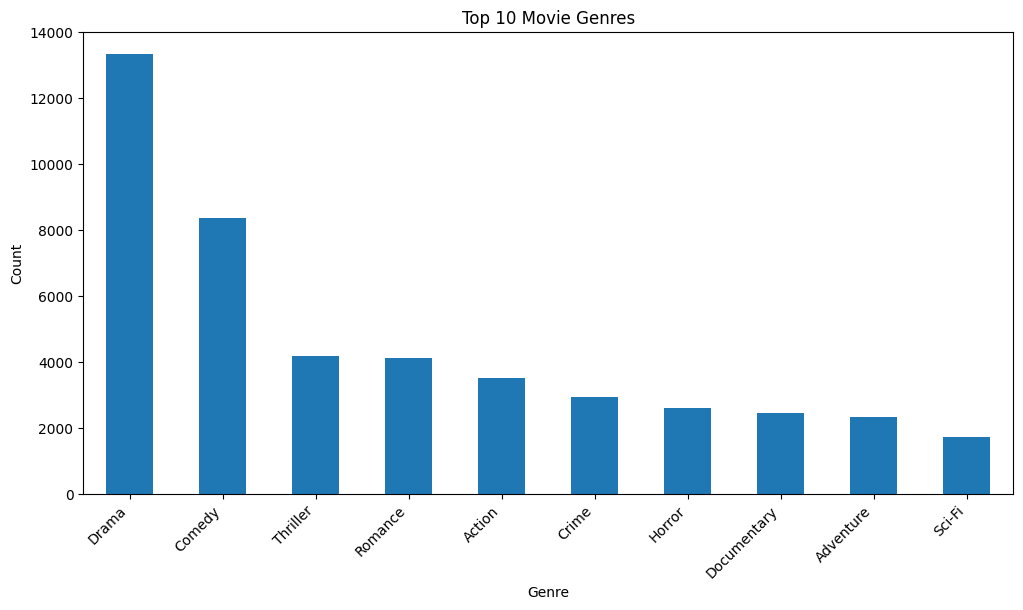

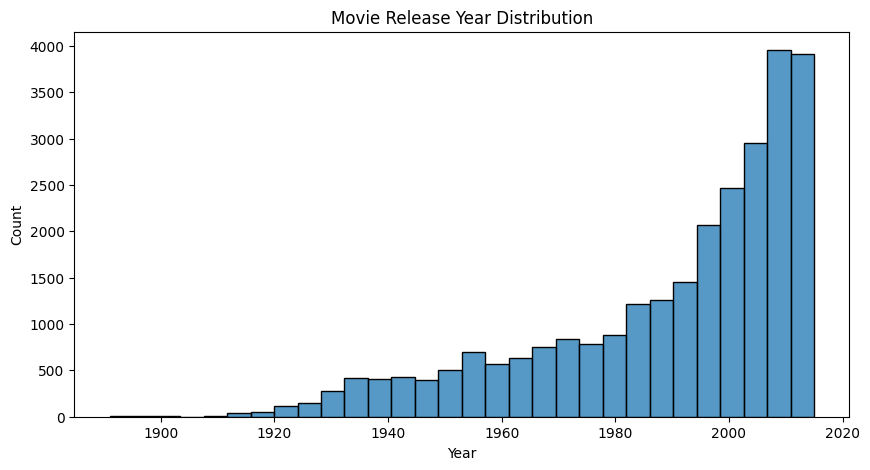

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
movies = pd.read_csv('/content/movies.csv')
tags = pd.read_csv('/content/genome-tags.csv')
links = pd.read_csv('/content/links.csv')

# --- Data Exploration ---

# 1. Basic Information
print("Movies Dataset:")
print(movies.info())  # Get data types, non-null counts
print(movies.describe())  # Summary statistics

# 2. Genre Analysis
genre_counts = movies['genres'].str.split('|').explode().value_counts()
print("\nTop 10 Genres:")
print(genre_counts.head(10))

plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()  # Display the plot


# 3. Movie Release Year Distribution
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')  # Extract year
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
plt.figure(figsize=(10, 5))
sns.histplot(movies['year'], bins=30)
plt.title('Movie Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()  # Display the plot

# 4. Correlation Analysis (if applicable)
# Assuming you have numerical features:
# correlation_matrix = movies.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# --- Further Exploration ---
# You can explore other aspects like:
# - Tag analysis (using the '